In [1]:
from quchem.Hamiltonian_Generator_Functions import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'LiH'
geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
basis = 'sto-6g'


### Get Hamiltonian
Hamilt = Hamiltonian_PySCF(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!
QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='BK')
### HAMILTONIAN end
QubitHamiltonian

(-3.9899724181893634+0j) [] +
(0.040374603256430996+0j) [X0 X1 X2] +
(-0.0031615876042053624+0j) [X0 X1 X2 X3 Y7 Y11] +
(0.0016204769263759007+0j) [X0 X1 X2 Y3 Y5] +
(0.003650850255675549+0j) [X0 X1 X2 Z3] +
(0.0018998726581459342+0j) [X0 X1 Z2 X3 Y7 Z9 Y10 X11] +
(0.004695260540245965+0j) [X0 X1 Z2 Y3 Y4 X5] +
(-0.0012113027134834468+0j) [X0 X1 X3 X4 Y7 Y11] +
(0.0010441957704832774+0j) [X0 X1 X3 Y4 Y5 Z6 Z7] +
(0.0012113027134834468+0j) [X0 X1 X3 Y4 Z5 Y7 Z9 Z10 X11] +
(0.0025594391105536875+0j) [X0 X1 X3 Z4 Y5 Y6 Z7] +
(6.648581206857335e-05+0j) [X0 X1 X3 Z4 Z5 Y7 Z9 Y10 X11] +
(0.0012777885255520203+0j) [X0 X1 X3 Z4 Y7 Z9 Y10 X11] +
(0.0009618499558327727+0j) [X0 X1 X3 X6 Y7 Y11] +
(-0.00015670172210402388+0j) [X0 X1 X3 Z6 Y7 Z9 Y10 X11] +
(0.0009618499558327727+0j) [X0 X1 X3 Y7 X8 Y11] +
(-0.0009618499558327727+0j) [X0 X1 X3 Y7 Y8 Z10 X11] +
(-0.0001567017221040238+0j) [X0 X1 X3 Y7 Z8 Z9 Y10 X11] +
(0.0008051482337287489+0j) [X0 X1 X3 Y7 Z8 Y10 X11] +
(0.015294910119291082+0j) [X0

The LiH ground state under JW is:

$$|\psi \rangle_{HF}^{ground} = | 1 1 1 1 \:  0 0 0 0 0 0 0 0 \rangle$$

and under BK is:

$$|\psi \rangle_{HF}^{ground} = | 1 0 1 0 0 0 0 0 0 0 0 0 \rangle$$

Use NOON to reduces this:

In [2]:
from quchem.Ansatz_Generator_Functions import *

##
NOON_spins_combined, NMO_basis = Hamilt.Get_NOON()
##
Hamilt.Get_CCSD_Amplitudes()

NOON_spins_combined

array([1.99991562e+00, 1.96764864e+00, 2.71791037e-02, 7.62575442e-05,
       2.59018655e-03, 2.59018655e-03])

LOOK at PHYS. REV. X, **8**, 031022 (2018)

Due to NOON:
- indices 0,1 assumed to ALWAYS be filled
- indices 8,9 and 10,11 ALWAYS unfilled! <--- decision



# Therefore Simplify Hamiltonian

In [6]:
ansatz_obj = BK_Qubit_Reduction(QubitHamiltonian,
                             Hamilt.molecule.n_electrons,
                             Hamilt.molecule.n_qubits)

The LiH ground state under JW is:

$$|\psi \rangle_{HF}^{ground} = | 1 1 1 1 \:  0 0 0 0 0 0 0 0 \rangle$$

and under BK is:

$$|\psi \rangle_{HF}^{ground} = | 1 0 1 0 0 0 0 0 0 0 0 0 \rangle$$


we have **fixed occupations** of indices [0,1,8,9,10,11]

- therefore can remove these terms from the Hamiltonian!

In [7]:
list_of_qubit_indices_to_remove = [0,1,8,9,10,11]
reduced_Qubit_Hamiltonian = ansatz_obj.Remove_indices_from_Hamiltonian(list_of_qubit_indices_to_remove)
print('Hamiltonian size reduced: {} --> {}'.format(len(list(QubitHamiltonian)), len(list(reduced_Qubit_Hamiltonian))))

Hamiltonian size reduced: 631 --> 239


In [8]:
qubit_re_label_dict, reduced_RE_LABELLED_Qubit_Hamiltonian = ansatz_obj.Re_label_Hamiltonian(reduced_Qubit_Hamiltonian)
reduced_RE_LABELLED_Qubit_Hamiltonian

(-7.264831837971689+0j) [] +
(0.10945352587995055+0j) [X0] +
(0.00934468360805053+0j) [X0 X1 X2 X3] +
(-0.0010620487016454435+0j) [X0 X1 X2 Y5] +
(0.0016204769263759007+0j) [X0 X1 Y2 X3] +
(-0.00027634696897366987+0j) [X0 X1 Y2 Y3 Z4 Z5] +
(0.0010620487016454435+0j) [X0 X1 Y2 Z3 Y5] +
(-0.0016204769263759007+0j) [X0 X1 Z2 X3] +
(0.0048364437280068425+0j) [X0 X1 Z2 Y3 Y4 Z5] +
(-0.0036483490336047166+0j) [X0 X1 Z2 Z3 Y5] +
(-0.002586300331959273+0j) [X0 X1 Z2 Y5] +
(0.004075918085156314+0j) [X0 X1 X4 Y5] +
(-0.009750569335355359+0j) [X0 X1 Z4 Y5] +
(-0.02338015757258478+0j) [X0 X1 Y5] +
(-0.0016204769263759007+0j) [X0 Y1 X2 X3] +
(0.000321845542621656+0j) [X0 Y1 X2 Y3] +
(0.0047390707472077884+0j) [X0 Y1 Y2 X3] +
(0.004560096759033173+0j) [X0 Y1 Y2 X3 Z4] +
(-0.0058630615794326175+0j) [X0 Y1 Z2 X3] +
(0.00024156424816620947+0j) [X0 Y1 Y3] +
(-0.0048364437280068425+0j) [X0 Y1 Y3 X4] +
(-0.004075918085156314+0j) [X0 Y1 Z3 Y4 X5] +
(-0.005674651250199045+0j) [X0 Y1 Z3 Z4 X5] +
(0.040548940

In [9]:
new_Molecular_H_MATRIX = Hamilt.Get_sparse_Qubit_Hamiltonian_matrix(reduced_RE_LABELLED_Qubit_Hamiltonian)


from scipy.sparse.linalg import eigs
eig_values, eig_vectors = eigs(new_Molecular_H_MATRIX)
new_FCI_Energy = min(eig_values)


print('new_FCI = ', new_FCI_Energy, 'VS old FCI:', Hamilt.molecule.fci_energy)

new_FCI =  (-7.94067717584014-1.895982401570339e-17j) VS old FCI: -7.875652564927912


## Looking at Ansatz

In [10]:
# automate:
# reduced_Sec_Quant_CC_ops_ia, reduced_Sec_Quant_CC_ops_ijab, reduced_theta_parameters_ia, reduced_theta_parameters_ijab =ansatz_obj.Remove_NOON_terms(
#     NOON=NOON_spins_combined,
#     occ_threshold= 1.999,
#     unocc_threshold=1e-4,
#     indices_to_remove_list_manual=None, 
#     single_cc_amplitudes=Hamilt.molecule.single_cc_amplitudes,
#     double_cc_amplitudes=Hamilt.molecule.double_cc_amplitudes,
#     singles_hamiltonian=Hamilt.singles_hamiltonian,
#     doubles_hamiltonian=Hamilt.doubles_hamiltonian,
#     tol_filter_small_terms=None)

# manual
reduced_Sec_Quant_CC_ops_ia, reduced_Sec_Quant_CC_ops_ijab, reduced_theta_parameters_ia, reduced_theta_parameters_ijab =ansatz_obj.Remove_NOON_terms(
    NOON=NOON_spins_combined,
    indices_to_remove_list_manual=[0,1,8,9,10,11])

In [11]:
ia_terms, ijab_terms, ia_theta, ijab_theta = ansatz_obj.Get_ia_and_ijab_terms()
print('REDUCTION')
print('ia_terms', len(ia_terms), 'TO', len(reduced_Sec_Quant_CC_ops_ia))
print('ijab_terms', len(ijab_terms), 'TO', len(reduced_Sec_Quant_CC_ops_ijab))

REDUCTION
ia_terms 16 TO 4
ijab_terms 42 TO 3


In [12]:
Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(reduced_Sec_Quant_CC_ops_ia,
                                                                                                                    reduced_Sec_Quant_CC_ops_ijab,
                                                                                                                   transformation='BK')

# # NO reduction!
# Qubit_Op_list_Second_Quant_CC_Ops_ia, Qubit_Op_list_Second_Quant_CC_Ops_ijab = ansatz_obj.UCCSD_single_trotter_step(ia_terms,
#                                                                                                                     ijab_terms,
#                                                                                                                    transformation='BK')


In [13]:
reduced_CC_ijab = ansatz_obj.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ijab, list_of_qubit_indices_to_remove)
len(reduced_CC_ijab)

3

In [14]:
reduced_RE_LABELLED_CC_ijab = ansatz_obj.Re_label_CC_qubit_operators( qubit_re_label_dict, 
                                                                   reduced_CC_ijab)
reduced_RE_LABELLED_CC_ijab

[0.125j [X0 X1 X2 Y3] +
 0.125j [X0 X1 Y2 X3] +
 -0.125j [X0 Y1 X2 X3] +
 0.125j [X0 Y1 Y2 Y3] +
 -0.125j [Y0 X1 X2 X3] +
 0.125j [Y0 X1 Y2 Y3] +
 -0.125j [Y0 Y1 X2 Y3] +
 -0.125j [Y0 Y1 Y2 X3],
 0.125j [X0 X1 X2 Z3 Z4 Y5] +
 0.125j [X0 X1 Y2 Z3 Z4 X5] +
 -0.125j [X0 Y1 X2 Z3 Z4 X5] +
 0.125j [X0 Y1 Y2 Z3 Z4 Y5] +
 -0.125j [Y0 X1 X2 Z3 Z4 X5] +
 0.125j [Y0 X1 Y2 Z3 Z4 Y5] +
 -0.125j [Y0 Y1 X2 Z3 Z4 Y5] +
 -0.125j [Y0 Y1 Y2 Z3 Z4 X5],
 0.125j [X0 X1 X4 Y5] +
 0.125j [X0 X1 Y4 X5] +
 -0.125j [X0 Y1 X4 X5] +
 0.125j [X0 Y1 Y4 Y5] +
 -0.125j [Y0 X1 X4 X5] +
 0.125j [Y0 X1 Y4 Y5] +
 -0.125j [Y0 Y1 X4 Y5] +
 -0.125j [Y0 Y1 Y4 X5]]

In [15]:
reduced_CC_ia = ansatz_obj.Remove_indices_from_CC_qubit_operators(Qubit_Op_list_Second_Quant_CC_Ops_ia, list_of_qubit_indices_to_remove)

reduced_RE_LABELLED_CC_ia = ansatz_obj.Re_label_CC_qubit_operators( qubit_re_label_dict, 
                                                                   reduced_CC_ia)
reduced_RE_LABELLED_CC_ia

[-0.5j [X0 Z1 Y2] +
 0.5j [Y0 Z1 X2],
 -0.5j [X0 Z1 Z2 Z3 Y4] +
 0.5j [Y0 Z1 Z2 Z3 X4],
 -0.5j [X1 Z2 Y3] +
 0.5j [Y1 Z2 X3],
 -0.5j [X1 Z2 Z3 Z4 Y5] +
 0.5j [Y1 Z2 Z3 Z4 X5]]

## HF input state

In [16]:
print('old input = ', ansatz_obj.Get_BK_HF_state_in_OCC_basis())

print('BUT following indices removed:', list_of_qubit_indices_to_remove)

ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove)

old input =  [1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
BUT following indices removed: [0, 1, 8, 9, 10, 11]


array([1., 0., 0., 0., 0., 0.])

# Ansatz

look at: From PHYS. REV. X, **8**, 031022 (2018)

can make a further reduction!

In [17]:
import random
theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_RE_LABELLED_CC_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_RE_LABELLED_CC_ijab))]

In [19]:
input_state = ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove)
print('input_state =', input_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
                                     reduced_RE_LABELLED_CC_ia, 
                                     reduced_RE_LABELLED_CC_ijab)

ansatz_cirq_circuit =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_ia_random_input, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
ansatz_cirq_circuit

input_state = [1. 0. 0. 0. 0. 0.]


0: ───X───Rx(0.5π)───@─────────────────────────@───Rx(-0.5π)───H───@────────────────────────@───────────H───Rx(0.5π)───@────────────────────────────────────────────────@───Rx(-0.5π)───H───@────────────────────────────────────────────────@───H──────────H────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@─────────────────────────────────@───────────H──────────Rx(0.5π)───@────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───H──────────@────────────────────────────────@──────────H───────────Rx(0.5π)───@─────────────────────────────────────────@───────────Rx(-0.5π)───H──────────@─────────────────────────────────────────@───────────H───────────H───@─────────────────────────────────────────@──────────H───Rx(0.5π)───@────────────────────────────────────────@───Rx(-0.5π)───H───@─────────────────────────────────────────────────@───────────H──────────Rx(0.5π)───@────────────────────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────────────────────@───Rx(-0.5π)───H──────────@───────────────────────────────────────────────────────@───H───────────Rx(0.5π)───@────────────────────────────────────────────────────────────────@───────────Rx(-0.5π)───H──────────@────────────────────────────────────────────────────────────────@───────────H───────────H───@────────────────────────────────────────────────────────────────@───H───Rx(0.5π)───@───────────────────────────────────────────────────────────────@───Rx(-0.5π)───H───@────────────────────────────────@───────────H──────────Rx(0.5π)───@───────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@───────────────────────────────@───Rx(-0.5π)───H──────────@───────────────────────────────@──────────H───────────Rx(0.5π)───@────────────────────────────────────────@───────────Rx(-0.5π)───H──────────@────────────────────────────────────────@───────────H───────────H───@────────────────────────────────────────@──────────H───Rx(0.5π)───@───────────────────────────────────────@───Rx(-0.5π)───
                     │                         │                   │                        │                          │                                                │                   │                                                │                                                                                                                                                                                                                                                       │                                 │                                 │                                │                                  │                                │                          │                                │                                 │                                         │                                  │                                         │                           │                                         │                         │                                        │                   │                                                 │                                 │                                                │                                  │                                                │                          │                                                       │                          │                                                                │                                  │                                                                │                           │                                                                │                  │                                                               │                   │                                │              

# Running Example

In [20]:
from quchem.Simulating_Quantum_Circuit import *

In [21]:
n_shots= 100


def VQE_experiment_ENERGY(theta_ia_ijab_list):
    
    theta_ia = theta_ia_ijab_list[0:len(reduced_theta_parameters_ia)]
    theta_ijab = theta_ia_ijab_list[len(reduced_theta_parameters_ia)::]
    
    ansatz_cirq_circuit =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_ia, 
                                             Theta_param_list_ijab=theta_ijab,
                                             ia_first=True)
    
    VQE_exp = VQE_Experiment(reduced_RE_LABELLED_Qubit_Hamiltonian, ansatz_cirq_circuit, n_shots)
    return VQE_exp.Calc_Energy().real

In [22]:
import random

theta_ia_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_theta_parameters_ia))]
theta_ijab_random_input = [random.uniform(0, 2*np.pi) for _ in range(len(reduced_theta_parameters_ijab))]

theta_combined_random_input = [*theta_ia_random_input, *theta_ijab_random_input]

VQE_experiment_ENERGY(theta_combined_random_input)

-7.1651537532670115

In [23]:
Hamilt.molecule.fci_energy

-7.875652564927912

In [ ]:
### optimizer
from quchem.Scipy_Optimizer import *

GG = Optimizer(VQE_experiment_ENERGY,
                   theta_combined_random_input,
                   args=(),
                   method='Nelder-Mead',
                   jac=None,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   display_convergence_message=True,
                   display_steps=True)

GG.get_env(50)
GG.plot_convergence()
plt.show()

# Using measurement reduction!

In [24]:
from quchem.LCU_method import *

In [25]:
Hamiltonian_graph_obj = Openfermion_Hamiltonian_Graph(reduced_RE_LABELLED_Qubit_Hamiltonian)

commutativity_flag = 'AC' ## <- defines relationship between sets!!!
plot_graph = False
Graph_colouring_strategy='largest_first'
anti_commuting_sets = Hamiltonian_graph_obj.Get_Clique_Cover_as_QubitOp(commutativity_flag, Graph_colouring_strategy=Graph_colouring_strategy, plot_graph=plot_graph)
anti_commuting_sets

Building Graph Edges: 100%|##########| 239/239 [00:02<00:00, 99.91it/s] 


{0: [(0.07828114149315567+0j) [Z1 Z3 Z5]],
 1: [(-7.264831837971689+0j) []],
 2: [(-0.14432019122698908+0j) [Z1 Z3 Z4 Z5],
  (0.005610346244611359+0j) [Y4],
  (0.01067144919224352+0j) [X4]],
 3: [(-0.1443201912269891+0j) [Z4],
  (0.005610346244611359+0j) [Z1 Z3 Y4 Z5],
  (0.01067144919224352+0j) [Z1 Z3 X4 Z5]],
 4: [(0.017548783925033312+0j) [Z0],
  (0.004931982511595288+0j) [Y0],
  (0.10945352587995055+0j) [X0]],
 5: [(-0.13431719877572418+0j) [Z2 Z3],
  (0.004739070747207784+0j) [X1 Z2 X3],
  (0.011871946723160848+0j) [Y2],
  (0.022273980559951875+0j) [X2],
  (0.0025594391105536875+0j) [X1 Z2 Y3 X4 Z5],
  (0.03287120818002483+0j) [Z1 Z2 X3 Y5],
  (0.0025594391105536875+0j) [X1 Z2 Y3 Y4 Z5],
  (-0.0010441957704832774+0j) [Y1 Z2 X3 Z4]],
 6: [(-0.13431719877572418+0j) [Z2],
  (0.011871946723160848+0j) [Y2 Z3],
  (0.005863061579432618+0j) [X1 Y2 X3],
  (0.0047390707472077884+0j) [X0 Y1 Y2 X3],
  (-0.0026889336468881933+0j) [Z1 Y2 X3 Y5],
  (0.0048364437280068425+0j) [Z0 X1 Y2 Y3 X4 Z5],

In [28]:
input_state = ansatz_obj.New_BK_HF_state(list_of_qubit_indices_to_remove)
print('input_state =', input_state)

UCCSD_ansatz_Q_Circ_obj = Ansatz_Circuit(input_state,
                                     reduced_RE_LABELLED_CC_ia, 
                                     reduced_RE_LABELLED_CC_ijab)

ansatz_cirq_circuit =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_ia_random_input, 
                                         Theta_param_list_ijab=theta_ijab_random_input,
                                         ia_first=True)
ansatz_cirq_circuit

input_state = [1. 0. 0. 0. 0. 0.]


0: ───X───Rx(0.5π)───@─────────────────────────@───Rx(-0.5π)───H───@────────────────────────@───────────H───Rx(0.5π)───@────────────────────────────────────────────────@───Rx(-0.5π)───H───@────────────────────────────────────────────────@───H──────────H──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@─────────────────────────────────@───────────H──────────Rx(0.5π)───@────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───H──────────@────────────────────────────────@──────────H───────────Rx(0.5π)───@─────────────────────────────────────────@───────────Rx(-0.5π)───H──────────@─────────────────────────────────────────@───────────H───────────H───@─────────────────────────────────────────@──────────H───Rx(0.5π)───@────────────────────────────────────────@───Rx(-0.5π)───H───@─────────────────────────────────────────────────@───────────H──────────Rx(0.5π)───@────────────────────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────────────────────@───Rx(-0.5π)───H──────────@───────────────────────────────────────────────────────@───H───────────Rx(0.5π)───@────────────────────────────────────────────────────────────────@───────────Rx(-0.5π)───H──────────@────────────────────────────────────────────────────────────────@───────────H───────────H───@────────────────────────────────────────────────────────────────@───H───Rx(0.5π)───@───────────────────────────────────────────────────────────────@───Rx(-0.5π)───H───@─────────────────────────────────@───────────H──────────Rx(0.5π)───@────────────────────────────────@───────────Rx(-0.5π)───Rx(0.5π)───@────────────────────────────────@───Rx(-0.5π)───H──────────@────────────────────────────────@──────────H───────────Rx(0.5π)───@─────────────────────────────────────────@───────────Rx(-0.5π)───H──────────@─────────────────────────────────────────@───────────H───────────H───@─────────────────────────────────────────@──────────H───Rx(0.5π)───@────────────────────────────────────────@───Rx(-0.5π)───
                     │                         │                   │                        │                          │                                                │                   │                                                │                                                                                                                                                                                                                                                         │                                 │                                 │                                │                                  │                                │                          │                                │                                 │                                         │                                  │                                         │                           │                                         │                         │                                        │                   │                                                 │                                 │                                                │                                  │                                                │                          │                                                       │                          │                                                                │                                  │                                                                │                           │                                                                │                  │                                                               │                   │                                 │ 

In [29]:
N_QUBITS = Hamilt.molecule.n_qubits - len(list_of_qubit_indices_to_remove)
n_shots= 100

def GIVE_ENERGY_LCU(theta_ia_theta_jab_list):
    theta_ia = theta_ia_theta_jab_list[:len(reduced_theta_parameters_ia)]
    theta_ijab = theta_ia_theta_jab_list[len(reduced_theta_parameters_ia):]
    
    ansatz_cirq_circuit =UCCSD_ansatz_Q_Circ_obj.Get_Full_HF_UCCSD_QC(Theta_param_list_ia=theta_ia, 
                                         Theta_param_list_ijab=theta_ijab,
                                         ia_first=True)

    VQE_exp_LCU =  VQE_Experiment_LCU_UP(anti_commuting_sets,
                     ansatz_cirq_circuit,
                     n_shots,
                     N_QUBITS,
                     N_indices_dict=None)#{7:0, 8:1, 9:0, 10:1})
    
    return VQE_exp_LCU.Calc_Energy().real


In [30]:
GIVE_ENERGY_LCU(theta_combined_random_input)

-7.211972856513159

# Optimization

In [31]:
def calc_gradient_ADAM(theta_ia_theta_jab_list):
    
    grad_list=[]
    
    for index, theta in enumerate(theta_ia_theta_jab_list):
        
        new_theta_list = theta_ia_theta_jab_list.copy()
        new_theta_list[index] = theta + np.pi/4
        
        Obs_PLUS = GIVE_ENERGY_LCU(new_theta_list)
               
        
        new_theta_list[index] = theta - np.pi/4
        Obs_MINUS = GIVE_ENERGY_LCU(new_theta_list)
        
        gradient = Obs_PLUS - Obs_MINUS
        
        grad_list.append(gradient)
        

    return np.array(grad_list)

In [32]:
### optimizer
from quchem.Scipy_Optimizer import _minimize_Adam, Optimizer

0: Input_to_Funct: [2.85233799 4.90479269 5.71024381 6.26818865 5.3326789  5.58662499
 1.97125288]: Output: -7.237719141606533
1: Input_to_Funct: [2.95106094 5.00486473 5.77700164 6.30876171 5.36627507 5.55543706
 2.0565747 ]: Output: -7.289344458699931
2: Input_to_Funct: [3.05027875 5.10059414 5.83157007 6.34804742 5.36462152 5.50676595
 2.1157471 ]: Output: -7.270916659272274
3: Input_to_Funct: [3.15011735 5.19770922 5.83113503 6.36555355 5.34827044 5.44264771
 2.18733504]: Output: -7.390633513905883
4: Input_to_Funct: [3.23326659 5.29569369 5.82792875 6.32772623 5.35721854 5.36998717
 2.26875373]: Output: -7.369708738942131
5: Input_to_Funct: [3.30223242 5.39492789 5.83925011 6.32399284 5.34691356 5.28869585
 2.3543655 ]: Output: -7.50024970579492
6: Input_to_Funct: [3.36676012 5.49512338 5.84700928 6.29944964 5.36005563 5.22788431
 2.37662016]: Output: -7.557755712497119
7: Input_to_Funct: [3.40451519 5.59633001 5.81038699 6.26495054 5.38974468 5.17472666
 2.39536513]: Output: -7.6

65: Input_to_Funct: [3.08790167 6.21273552 6.13453622 6.1763687  6.18936985 5.10278425
 1.38465746]: Output: -7.857809027198793
66: Input_to_Funct: [3.08780715 6.20871041 6.14170013 6.18833316 6.20115014 5.11455266
 1.36296422]: Output: -7.851480202630968
67: Input_to_Funct: [3.09631773 6.20606507 6.15384857 6.18756131 6.21840634 5.12858217
 1.35356735]: Output: -7.843676714858506
68: Input_to_Funct: [3.10884667 6.20363962 6.16079767 6.18998081 6.2304698  5.13503528
 1.34722682]: Output: -7.838964372974749
69: Input_to_Funct: [3.12835541 6.20405119 6.1662354  6.18245869 6.24493083 5.14986977
 1.32775289]: Output: -7.869424565545742
70: Input_to_Funct: [3.14048736 6.21134729 6.15508248 6.17014338 6.25361072 5.15428574
 1.31774512]: Output: -7.800458875306658
71: Input_to_Funct: [3.1606728  6.21764148 6.15931869 6.15655733 6.26725136 5.18195996
 1.30265254]: Output: -7.81661094222983
72: Input_to_Funct: [3.17408011 6.2243635  6.15675553 6.14629958 6.27181119 5.21782711
 1.30237057]: Outp

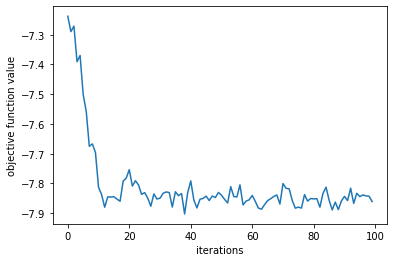

In [33]:
custom_optimizer_DICT = {'learning_rate': 0.1, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-8,
                           'delta': 1e-8, 'maxfev': 15000}

GG = Optimizer(GIVE_ENERGY_LCU,
                   theta_combined_random_input,
                   args=(),
                   method=_minimize_Adam,
                   jac=calc_gradient_ADAM,
                   hess=None,
                   hessp=None,
                      bounds=None,
                   constraints=None,
                   tol=1e-20, 
                   display_convergence_message=True,
                   display_steps=True, 
                   custom_optimizer_DICT=custom_optimizer_DICT)
GG.get_env(100)
GG.plot_convergence()
plt.show()

In [ ]:
Hamilt.molecule.fci_energy

# Linear Alg CHECK!